In [1]:
# import dependecies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
maindf = pd.read_csv('/content/drive/MyDrive/HospitalCost.csv')

maindf.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1338, 7)

In [3]:
maindf

,age,sex,bmi,children,smoker,region,charges
0,19,female,37.900,0,yes,southwest,16884.93400
1,18,male,33.770,1,no,southeast,1735.55330
2,38,male,33.000,3,no,southeast,4449.46300
3,33,male,33.705,0,no,northwest,31984.47061
4,33,male,38.880,0,no,northwest,3866.85530
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.930,0,no,northeast,3305.98080
1335,18,female,36.850,0,no,southeast,1639.83350
1336,31,female,35.800,0,no,southwest,3007.94500


In [4]:
#Which categories are included in our data set?
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
maindf.describe() #The function “describe” will present characteristics of all numerical categories


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,41.399103,35.182896,1.274290,14248.177488
std,12.359998,4.520202,1.387608,13091.652901
min,18.000000,15.960000,0.000000,1131.506600
25%,33.000000,33.300000,0.000000,4740.362225
50%,39.000000,35.300000,1.000000,9389.088100
75%,51.000000,37.903750,3.000000,16639.912515
max,64.000000,53.580000,5.000000,63770.438010


# Data Analysis

# Age Group

In [6]:
maindf["age"].describe()

count    1338.000000
mean       41.399103
std        12.359998
min        18.000000
25%        33.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='index'>

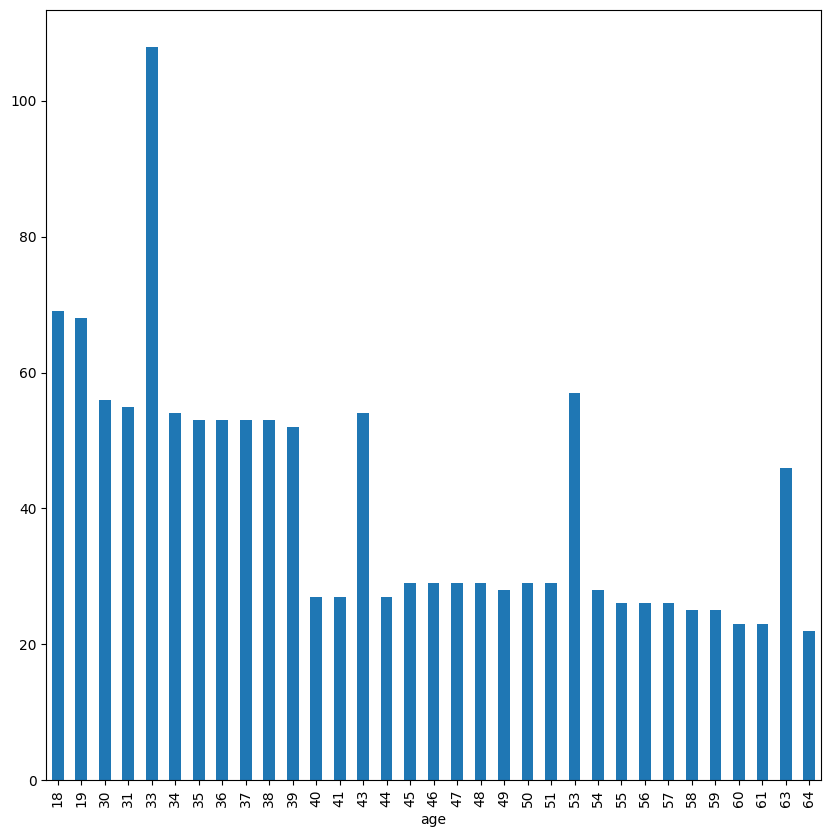

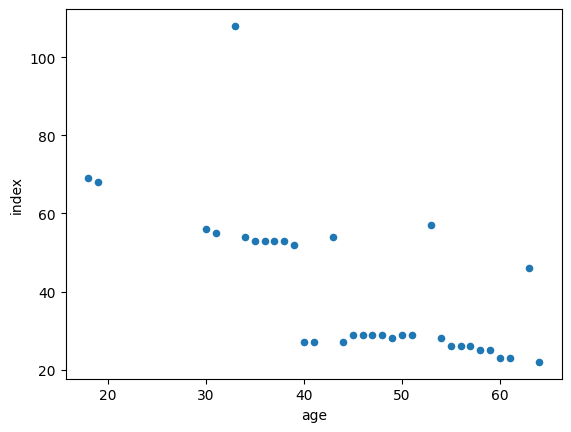

In [7]:
maindf.reset_index().groupby('age')['index'].count().plot(kind='bar',figsize=(10,10))
pd.DataFrame(maindf.reset_index().groupby('age')['index'].count().reset_index()).plot(kind='scatter',x='age',y='index')

# Scatter Plot showing Age/Charges

<Axes: xlabel='region', ylabel='charges'>

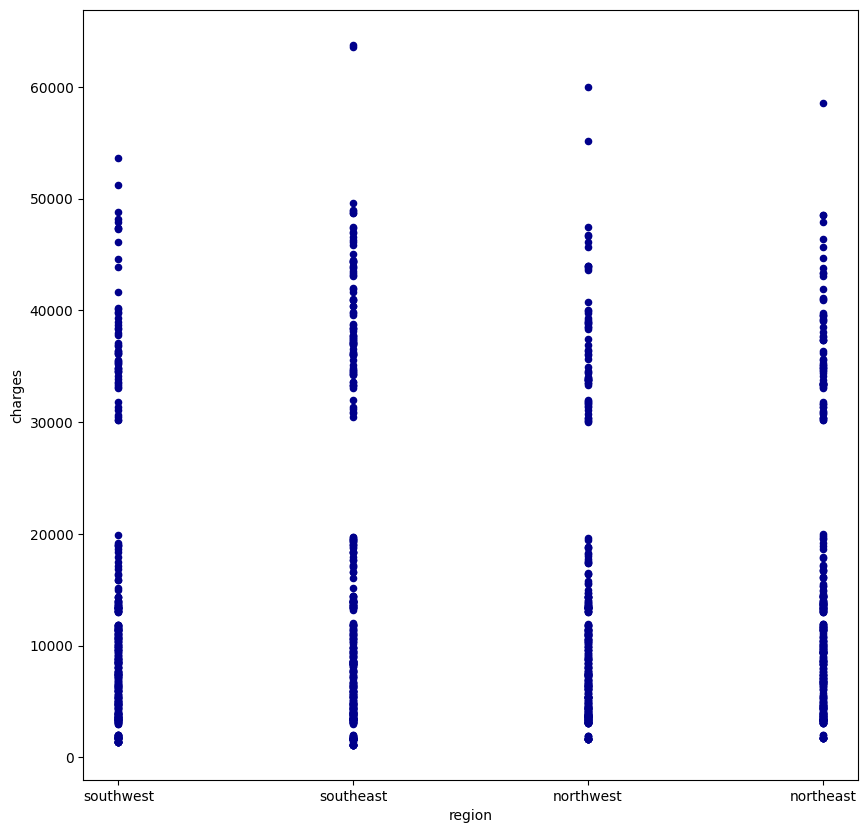

In [8]:
maindf[['region','charges']].plot(kind='scatter',x='region',y='charges',c='DarkBlue',figsize=(10,10))

<Axes: >

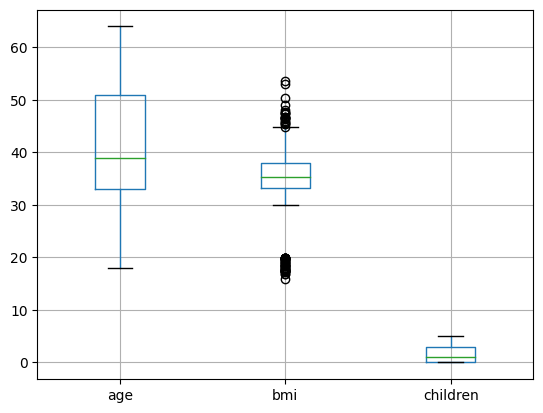

In [9]:
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])
maindf.boxplot(column=['age', 'bmi', 'children']) #Box Plot: A Graphical Way to Show minimum, maximum, median, and two quartiles

# Data Analysis on Gender

In [10]:
maindf['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

<Axes: >

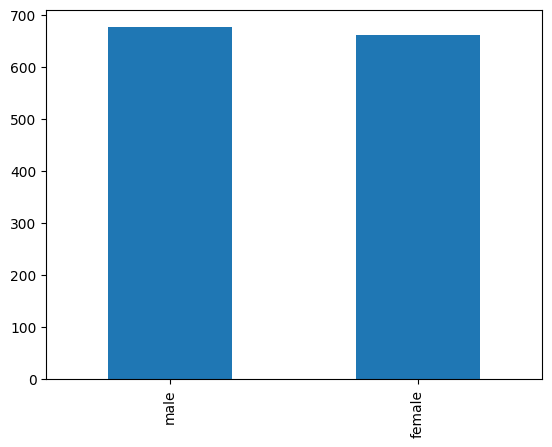

In [11]:
maindf['sex'].value_counts().plot(kind='bar')

# Analysis between Sex & Charges

array([<Axes: xlabel='sex'>, <Axes: xlabel='sex'>], dtype=object)

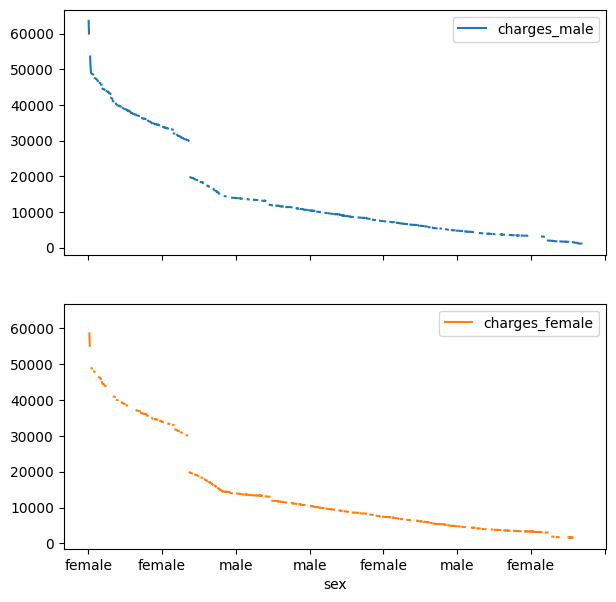

In [12]:
temp = maindf[['sex', 'charges']].copy()  # Create a copy to avoid SettingWithCopyWarning

temp.loc[temp['sex'] == 'male', 'charges_male'] = temp.loc[temp['sex'] == 'male', 'charges']
temp.loc[temp['sex'] != 'male', 'charges_female'] = temp.loc[temp['sex'] != 'male', 'charges']

temp = temp.sort_values('charges', ascending=False)

# Plotting the charges for male and female separately
temp[['sex', 'charges_male', 'charges_female']].set_index('sex').plot(figsize=(7, 7), subplots=True)


In [13]:
temp['charges_male'].describe()

count      676.000000
mean     14907.099375
std      13825.553581
min       1131.506600
25%       4619.159000
50%       9387.099000
75%      18990.340250
max      63593.873090
Name: charges_male, dtype: float64

In [14]:
temp['charges_female'].describe()

count      662.000000
mean     13575.320696
std      12271.114721
min       1607.510100
25%       4885.158700
50%       9412.967500
75%      14454.691825
max      63770.438010
Name: charges_female, dtype: float64

<Axes: xlabel='sex', ylabel='charges'>

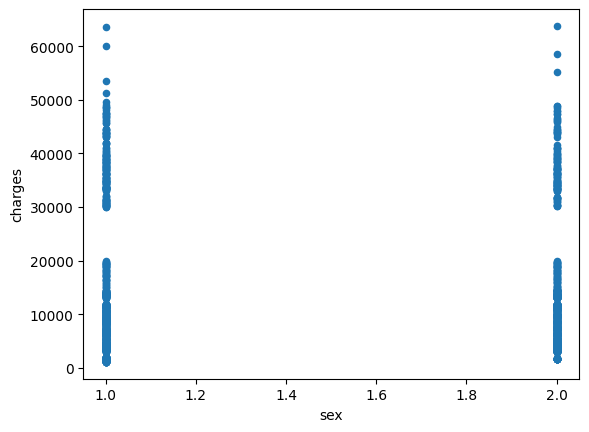

In [15]:
temp=maindf.copy()
temp.loc[temp['sex']=='male','sex']=str(1)
temp.loc[temp['sex']!='1','sex']=str(2)

temp['sex']= temp['sex'].astype(int)
#temp['sex'].unique()
temp[['sex','charges']].plot(kind='scatter',x='sex',y='charges')

# BMI Analysis

In [16]:
maindf['bmi'].describe()

count    1338.000000
mean       35.182896
std         4.520202
min        15.960000
25%        33.300000
50%        35.300000
75%        37.903750
max        53.580000
Name: bmi, dtype: float64

<Axes: xlabel='bmi', ylabel='charges'>

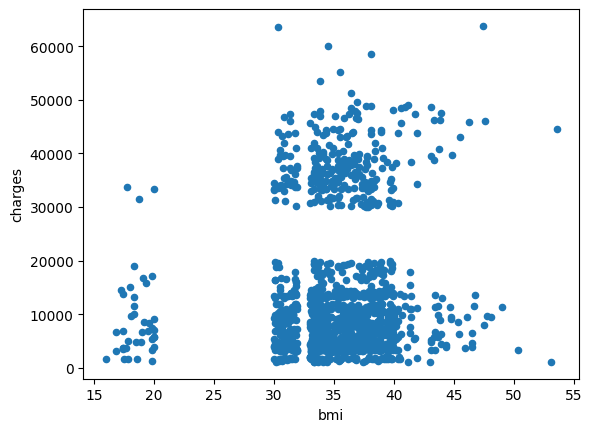

In [17]:
maindf[['bmi','charges']].plot(kind='scatter',x='bmi',y='charges')

# Analysis with Children

In [18]:
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
maindf['children'].describe()

count    1338.000000
mean        1.274290
std         1.387608
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: children, dtype: float64

<Axes: >

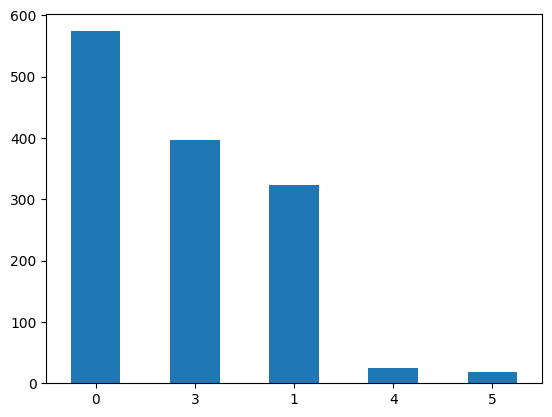

In [20]:
maindf['children'].value_counts().plot(kind='bar',rot=0)

<Axes: xlabel='children', ylabel='charges'>

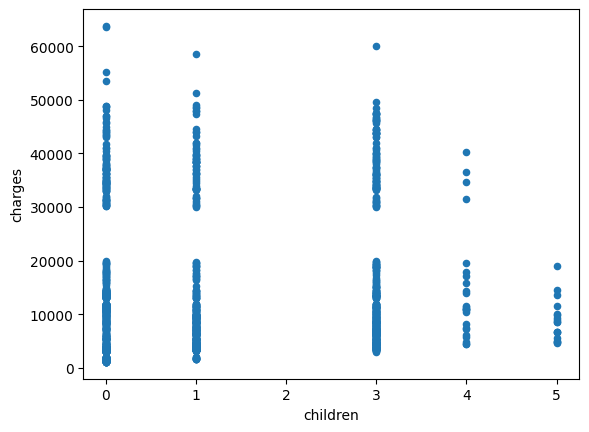

In [21]:
maindf[['children','charges']].plot(kind='scatter',x='children',y='charges')

# Analysis on Smokers

In [22]:
maindf['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [23]:
maindf.loc[maindf['smoker'] == 'no', 'smoker'] = '0'
maindf.loc[maindf['smoker'] != '0', 'smoker'] = '1'
maindf['smoker'] = maindf['smoker'].astype(int)


<Axes: xlabel='smoker', ylabel='charges'>

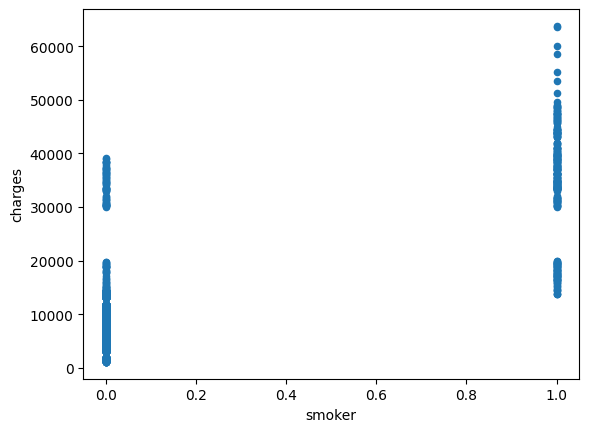

In [24]:
maindf[['smoker','charges']].plot(kind='scatter',x='smoker',y='charges')

# Regional Analysis

<Axes: >

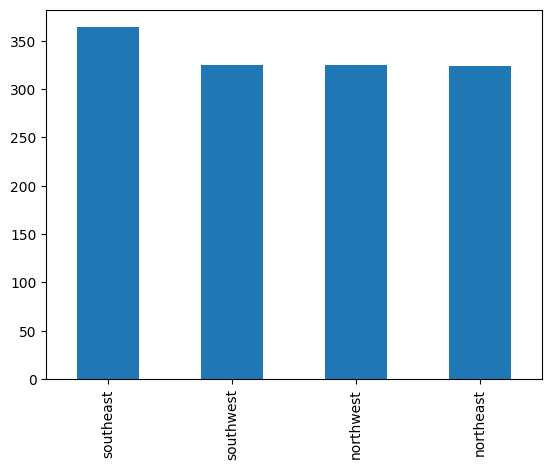

In [25]:
maindf['region'].value_counts().plot(kind='bar')

southwest  =  0
southeast  =  1
northwest  =  2
northeast  =  3


<Axes: xlabel='region', ylabel='charges'>

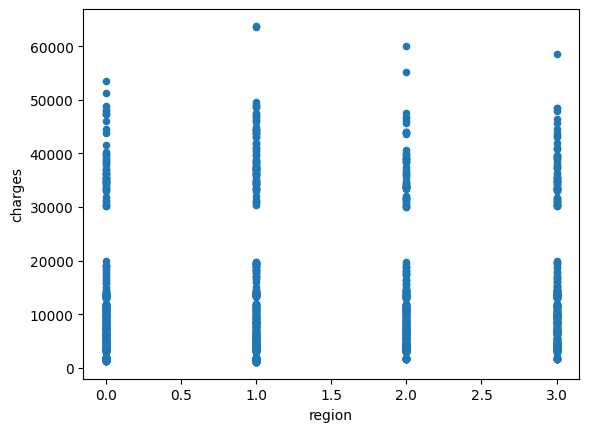

In [46]:
temp = maindf[['region','charges']].copy()
temp['temp'] = np.nan
q=-1
for region in maindf['region'].unique():
    q+=1
    temp.loc[temp['region']==region,'temp'] = str(q)
    print(region,' = ',q)

temp['region'] = np.nan
temp['region']= temp['temp']
temp['region'] = temp['region'].astype(int)
del temp['temp']
temp[['region','charges']].plot(kind='scatter',x='region',y='charges')

# Correlating each variables with charges

In [47]:
maindf = pd.read_csv('/content/drive/MyDrive/HospitalCost.csv')

In [48]:
temp = maindf.copy()

temp.loc[temp['sex'] == 'male', 'sex'] = '1'
temp.loc[temp['sex'] != '1', 'sex'] = '2'
temp['sex'] = temp['sex'].astype(int)

temp.loc[temp['smoker'] == 'no', 'smoker'] = '0'
temp.loc[temp['smoker'] != '0', 'smoker'] = '1'
temp['smoker'] = temp['smoker'].astype(int)

temp['temp'] = np.nan
q = -1

for region in maindf['region'].unique():
    q += 1
    temp.loc[temp['region'] == region, 'temp'] = str(q)

temp['region'] = temp['temp'].astype(int)
del temp['temp']

maindf = temp.copy()

In [49]:
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [50]:
maindf.corr()['charges'].sort_values(ascending=False)[1:]

smoker      0.778773
age         0.292302
bmi         0.072514
children    0.069397
region      0.019966
sex        -0.050880
Name: charges, dtype: float64

# Findings

###### Finding correlations between different categories, e.g. bmi vs charges, smokers vs charges, children vs charges:
##### It seems smokerS is highest when correlated with charges and the same pattern can be seen in visuals of smoker vs charges.

##### What categories contributed more to the health cost, if so & why? categories columns : smoker,children,region. Yes, smoker is contrbuting most to the health cost , and rightly so is because smokers are more vulnerable to lung cancer, and other types of cancer , so they do spend more on insurance.

##### What are the effects of medical/health cost between male & female, cigarettes usage, BMI effects? Effects of health cost on sex: Gender does not contribute at all to charges, means gender has no effect on charges . Either you are male and female, charges are unrelated to this.

##### Effects of cigrattes (smokers) on health cost: As obvious, smokers are more vulnerable to health issues so they do have more charges than non-smokers effect of BMI on health cost: As shown in above visuals 'bmi vs charges' , there is a mix of response on charges, low bmi's also have high charges and high bmi's do also have high charges, and correlation also close to 0, so we can say that BMI has no effect on health cost.

# Machine Learning Part

Purpose: To determine the effect of several factors on insurance costs & predict the cost of health insurance based on factors that influence it.

In [51]:
maindf = pd.read_csv('/content/drive/MyDrive/HospitalCost.csv')
maindf.shape

(1338, 7)

From the data analysis part we can see 3 factors are most influencing for the charge colum:
a) smoker
b) age
c) bmi
All 3 columns are responsible for the increase or decrease in price

### Converting categorical column "Smoker" into integer for ML algorithm input

In [53]:
maindf.loc[maindf['smoker'] == 'no', 'smoker'] = '0'
maindf.loc[maindf['smoker'] != '0', 'smoker'] = '1'
maindf['smoker'] = maindf['smoker'].astype(int)

In [54]:
maindf.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

### Now we do have columns in integer and floating points

In [55]:
y = maindf['charges']
x = maindf[['smoker','age','bmi']].iloc[:,:]
x

,smoker,age,bmi
0,1,19,37.900
1,1,18,33.770
2,1,38,33.000
3,1,33,33.705
4,1,33,38.880
...,...,...,...
1333,1,50,30.970
1334,1,18,31.930
1335,1,18,36.850
1336,1,31,35.800


### Normalizing inut columns age and bmi

In [56]:
x = x.copy()  # Create a copy to avoid modifying the original DataFrame

x.loc[:, 'age'] = x['age'] / x['age'].max()
x.loc[:, 'bmi'] = x['bmi'] / x['bmi'].max()

### Train test split to judge how well our model is performing

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [60]:
#Finally, we can proceed with the procedure of importing and fitting the Linear Regression model.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,x.columns,
columns=['Coefficient'])

print(coeff_df)

-1270.7213250108998
         Coefficient
smoker      0.000000
age     19208.329583
bmi      4849.113624


In [62]:
predictions = lm.predict(X_test)
print("Predicted medical costs values:", predictions)


Predicted medical costs values: [15418.55407095 12251.7483525  21275.7858612  15770.27053582
  7321.49019095 12906.75505488  7464.93634797 21368.09821461
 11708.05948805 16937.19027991 10846.46253691 13803.0803932
 14017.34085918 16458.54058261 20441.3470952  16359.55555728
 17388.79679319 16150.49522748 15978.87835408 14973.05271693
 12301.86213191 14675.75263754  7183.02166082 12236.01795688
 17186.63913757 17984.42446912 19913.71864381 12585.36435591
 16147.78015826  6859.36091121 14291.2253398  18717.83816139
 11189.12877105  9538.70419685 12249.03328328 15837.57975361
 11327.59730117 15245.91717335 17725.02035767 12728.69551181
  7925.14058044 11470.82094891 18776.54965999 19646.1693247
 11869.0311009  19830.79403153 11076.90591003 12338.06305481
 14890.24310577 11507.69689264 20922.71186172  7694.69720731
 14483.99525429  7401.92224329 18652.56149903 16732.31755507
 10942.39498261 11145.68766356 19132.45372982 17654.428558
 20515.451479   11636.54767938 20304.35110081 14801.09833

Graphical comparison of expected values of our analysis

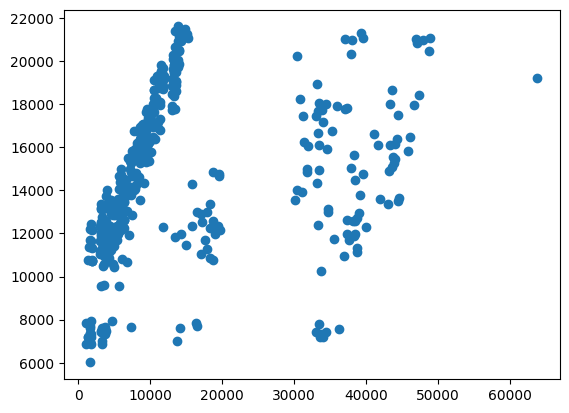

In [64]:


 plt.scatter(y_test, predictions)

## Finally, let’s calculate and print mean absolute error (MAE) and mean squared error (MSE) for our predictions

In [66]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test, predictions))
print("MSE",metrics.mean_squared_error(y_test, predictions))

MAE 10299.966484956152
MSE 156715808.7727833


### Decision Tree Regressor

In [67]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor()

cross_val_score(regressor, X_train, y_train, cv=10)
regressor=regressor.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = regressor.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred,squared=True))


17918.175292666747

THE Root Mean Square Error (RMSE) SCORE: 9781 is of base model difference between a statistical model’s predicted values and the actual values

In [68]:
print(pd.DataFrame(data=[x.columns,regressor.feature_importances_,]))

        0         1         2
0  smoker       age       bmi
1     0.0  0.325169  0.674831


The model is also showing the data analysis part to be strong by suggesting the smoker columns are the most important (61%) of all three variables above.

# HYPER PARAMETER TUNING : finding the best settings for a machine learning model

In [70]:
final_regressor = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=10, min_samples_split=50,min_samples_leaf=5, min_weight_fraction_leaf=0.001, max_features=2, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.01)

cross_val_score(final_regressor, X_train, y_train, cv=10)
final_regressor = final_regressor.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = final_regressor.predict(X_test)
sqrt_mean_squared_error = sqrt(mean_squared_error(y_test, y_pred))


The model looks better after hyperparameter tuning. So, lets try XGboost regressor and see if this will produce a better result than this.

In [71]:
from sklearn import ensemble
regressor = ensemble.GradientBoostingRegressor(
    loss='squared_error', learning_rate=0.01, n_estimators=70, subsample=1.0,
    criterion='friedman_mse', min_samples_split=50, min_samples_leaf=5,
    min_weight_fraction_leaf=0.0, max_depth=10, min_impurity_decrease=0.0,
    init=None, random_state=None, max_features=None, alpha=0.9,
    verbose=0, max_leaf_nodes=None, warm_start=False,
    validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.01
)

cross_val_score(regressor, X_train, y_train, cv=10)
regressor=regressor.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = regressor.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred,squared=True))

12767.794701575924